<a href="https://colab.research.google.com/github/Jair-RM/Simulacion-I-Figols/blob/main/Ejercicio_14_Octubre_(Lineas_de_espera).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
from math import log, exp, sqrt, cos, acos, pi, sin, factorial
from statistics import mean, stdev, variance
from scipy.stats import norm
import random as rnd
from random import random, gauss
import numpy as np
import matplotlib.pyplot as plt
from time import time
#from numba import jit

In [ ]:
# Considere una linea de espera de un solo servidor en la que los usuarios
# llegan siguiendo un proceso de Poisson con parametro λ usuario/minuto. Los
# tiempos de atencion a los usuarios siguen una distribucion exponencial con
# parametro 0.8 usuarios/minuto. Ademas se cumple que "primero e llegar,
# primero en salir."
# Estime por simulacion.
# a) El valor esperado del valor medio del numero de usuarios en el sistema
#    en el intervalo [0, 60]
# b) El valor esperado del maximo numero de personas en el intervalo [0, 60]
# c) La probabilidad de que el maximo numero de personas en el sistema sea
#    mayor que 20 en el intervalo [0, 60]
# d) Estimar el valor esperado del tiempo de permanencia de los usuarios en el
#    sistema en el intervalo [0, 60]

In [7]:
# Chat GPT
from math import log
from random import random

def simulacion(l_l=1, l_s=0.8, T=60):
    t = 0
    infi = float('inf')
    ts = infi
    tl = 0
    l = 0
    maxi = 0
    total_tiempo_permanencia = 0
    num_usuarios = 0

    while min(tl, ts) < T:
        ta = t  # Registro del tiempo actual
        t = min(tl, ts)

        if t == tl:
            # Un nuevo usuario llega
            num_usuarios += 1
            l += 1
            tiempo_llegada = t  # Registro del tiempo de llegada
            tl = t - (1/l_l) * log(random())
            if l == 1:
                ts = t - (1/l_s) * log(random())
        else:
            # Un usuario es atendido
            tiempo_permanencia = t - tiempo_llegada  # Cálculo del tiempo de permanencia
            total_tiempo_permanencia += tiempo_permanencia
            l -= 1
            if l > 0:
                ts = t - (1/l_s) * log(random())
            else:
                ts = infi

        if l > maxi:
            maxi = l

    # Cálculo del área para el valor medio
    area = l * (T - t) + total_tiempo_permanencia  # Cálculo corregido
    valor_medio = area / T
    tiempo_esperado_permanencia = total_tiempo_permanencia / num_usuarios if num_usuarios > 0 else 0

    return valor_medio, maxi, tiempo_esperado_permanencia

ns = 100000
suma_valor_medio = 0
suma_maximo = 0
suma_tiempo_permanencia = 0
maximos = []

for i in range(ns):
    valor_medio, maximo, tiempo_permanencia = simulacion()
    suma_valor_medio += valor_medio
    suma_maximo += maximo
    suma_tiempo_permanencia += tiempo_permanencia
    maximos.append(maximo)

valor_esperado_valor_medio = suma_valor_medio / ns
valor_esperado_maximo = suma_maximo / ns
valor_esperado_tiempo_permanencia = suma_tiempo_permanencia / ns
probabilidad_mayor_20 = sum(1 for m in maximos if m > 20) / ns

print(f"Valor esperado del número medio de usuarios en el sistema: {valor_esperado_valor_medio:.2f}")
print(f"Valor esperado del máximo número de usuarios en el sistema: {valor_esperado_maximo:.2f}")
print(f"Probabilidad de que el máximo número de usuarios sea mayor que 20: {probabilidad_mayor_20:.4f}")
print(f"Valor esperado del tiempo de permanencia en el sistema: {valor_esperado_tiempo_permanencia:.2f} minutos")

Valor esperado del número medio de usuarios en el sistema: 0.84
Valor esperado del máximo número de usuarios en el sistema: 18.65
Probabilidad de que el máximo número de usuarios sea mayor que 20: 0.3695
Valor esperado del tiempo de permanencia en el sistema: 0.70 minutos


In [10]:
# Profesor inciso a
from math import log
from random import random
import matplotlib.pyplot as plt
def f():
  T=60
  l_l=1
  l_s=0.8
  t=0
  infi=1000000000
  ts=infi
  tl=0
  l=0

  suma=0   #variables de los rectangulos para calcular p

  maxi=0
  while min(tl, ts)<T:

    ta=t
    t=min(tl, ts)

    suma= suma+l*(t- ta)
    if t==tl:
      l=l+1

      tl=t - (1/l_l)*log(random())
      if l==1:
        ts=t - (1/l_s)*log(random())
    else:
      l=l-1

      if l==0:
        ts=infi
      else:
        ts=t - (1/l_s)*log(random())
    if l > maxi:
      maxi=l
  suma= suma+l*(T-t)
  return suma/T, maxi   #area de los rectangulos entre el tiempo y valor maximo
nr=100000
suma1=0
suma2=0
cuenta=0

for i in range(nr):
  med, maxi=f()
  suma1=suma1+ med
  suma2=suma2 +maxi
  if maxi > 20:
    cuenta=cuenta+1
print(suma1/nr, suma2/nr, cuenta/nr)


9.000968522671721 18.67866 0.37098


In [13]:
# Profesor
from math import log
from random import random
import matplotlib.pyplot as plt
def f():
  T=60
  l_l=1
  l_s=0.8
  t=0
  infi=1000000000
  ts=infi
  tl=0
  l=0

  suma=0   #variables de los rectangulos para calcular p

  maxi=0
  while min(tl, ts)<T:

    ta=t
    t=min(tl, ts)

    suma= suma+l*(t- ta)
    if t==tl:
      l=l+1

      tl=t - (1/l_l)*log(random())
      if l==1:
        ts=t - (1/l_s)*log(random())
    else:
      l=l-1

      if l==0:
        ts=infi
      else:
        ts=t - (1/l_s)*log(random())
    if l > maxi:
      maxi=l
  suma= suma+l*(T-t)
  return suma/T, maxi   #area de los rectangulos entre el tiempo y valor maximo

#para mayor comprension
for i in range(15):
  a,b=f()
  print("%3d"%i, "%10.4f"%a, "%10.4f"%b)



  0     4.4703    13.0000
  1     7.1605    13.0000
  2     5.4620    16.0000
  3     5.7453    13.0000
  4    12.2293    22.0000
  5     8.9360    19.0000
  6     2.4615     6.0000
  7     1.3630     5.0000
  8    11.0013    19.0000
  9    13.1492    23.0000
 10     5.6901    12.0000
 11    15.0184    29.0000
 12     9.6668    24.0000
 13     5.7797    11.0000
 14     8.4741    21.0000


6.547887432043528


<function matplotlib.pyplot.show(close=None, block=None)>

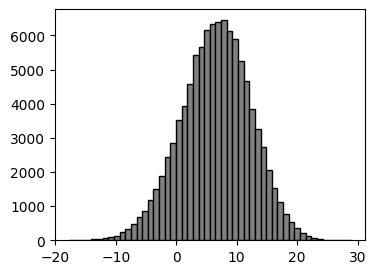

In [15]:
# Profesor inciso b
from math import log
from random import random
import matplotlib.pyplot as plt
def f():
  T=60
  l_l=1
  l_s=0.8
  t=0
  infi=1000000000
  ts=infi
  tl=0
  l=0
  ll=[]
  ls=[]
  suma=0   #variables de los rectangulos para calcular p

  while min(tl, ts)<T:
    t=min(tl, ts)
    if t==tl:
      ll.append(t) ######
      l=l+1

      tl=t - (1/l_l)*log(random())
      if l==1:
        ts=t - (1/l_s)*log(random())
    else:######
      ls.append(t)
      l=l+1

      if l==0:
        ts=infi
      else:
        ts=t - (1/l_s)*log(random())
  suma=0
  n=min(len(ll), len(ls))
  for i in range(n):
    suma=suma+(ls[i]-ll[i])
  return suma/n

nr=100000
suma=0
l=[]

for i in range(nr):
  tiempo=f()
  l.append(tiempo)
  suma=suma+tiempo
print(suma/nr)
plt.figure(figsize=(4,3))
plt.hist(l, bins=50, color="grey", edgecolor="black")
plt.show